In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
!pip install wordcloud

from wordcloud import WordCloud
warnings.filterwarnings(action = 'ignore')

In [4]:
df=pd.read_csv('books_of_the_decade.csv')
df

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509
...,...,...,...,...,...,...
2324,2325,"Unholy Terrors (Scarlett Force, #2)",C.M. Stunich,4.49,"3,764",4
2325,2326,What Happened to the Bennetts,Lisa Scottoline,3.80,"73,552",4
2326,2327,Troubled: The Failed Promise of America's Beha...,Kenneth R. Rosen,3.48,430,3
2327,2328,The Foundling,Ann Leary,3.89,"12,851",3


In [28]:
df.head()

,Index,Book Name,Author,Rating,Number of Votes,Score
0,1,The Invisible Life of Addie LaRue,Victoria Schwab,4.18,"1,184,531",62443
1,2,The House in the Cerulean Sea (Cerulean Chroni...,T.J. Klune,4.40,"718,243",47323
2,3,Project Hail Mary,Andy Weir,4.51,"657,869",45972
3,4,The Midnight Library,Matt Haig,3.99,"1,967,348",42746
4,5,I'm Glad My Mom Died,Jennette McCurdy,4.46,"1,151,831",37509


In [29]:
df.tail()

,Index,Book Name,Author,Rating,Number of Votes,Score
2324,2325,"Unholy Terrors (Scarlett Force, #2)",C.M. Stunich,4.49,"3,764",4
2325,2326,What Happened to the Bennetts,Lisa Scottoline,3.80,"73,552",4
2326,2327,Troubled: The Failed Promise of America's Beha...,Kenneth R. Rosen,3.48,430,3
2327,2328,The Foundling,Ann Leary,3.89,"12,851",3
2328,2329,The Mermaid from Jeju,Sumi Hahn,3.89,"3,774",2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            2329 non-null   int64 
 1   Book Name        2329 non-null   object
 2   Author           2329 non-null   object
 3   Rating           2329 non-null   object
 4   Number of Votes  2329 non-null   object
 5   Score            2329 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 109.3+ KB


In [31]:
df.columns

Index(['Index', 'Book Name', 'Author', 'Rating', 'Number of Votes', 'Score'], dtype='object')

In [32]:
df.isna().sum()

Index              0
Book Name          0
Author             0
Rating             0
Number of Votes    0
Score              0
dtype: int64

In [33]:
df.describe()

,Index,Score
count,2329.000000,2329.000000
mean,1165.000000,597.599399
std,672.468711,2947.850623
min,1.000000,2.000000
25%,583.000000,79.000000
50%,1165.000000,97.000000
75%,1747.000000,195.000000
max,2329.000000,62443.000000


In [34]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2324    False
2325    False
2326    False
2327    False
2328    False
Length: 2329, dtype: bool

In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()


columns_to_encode = ['Book Name','Rating', 'Number of Votes']  # Replace with your columns

# Apply LabelEncoder to each column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a futu

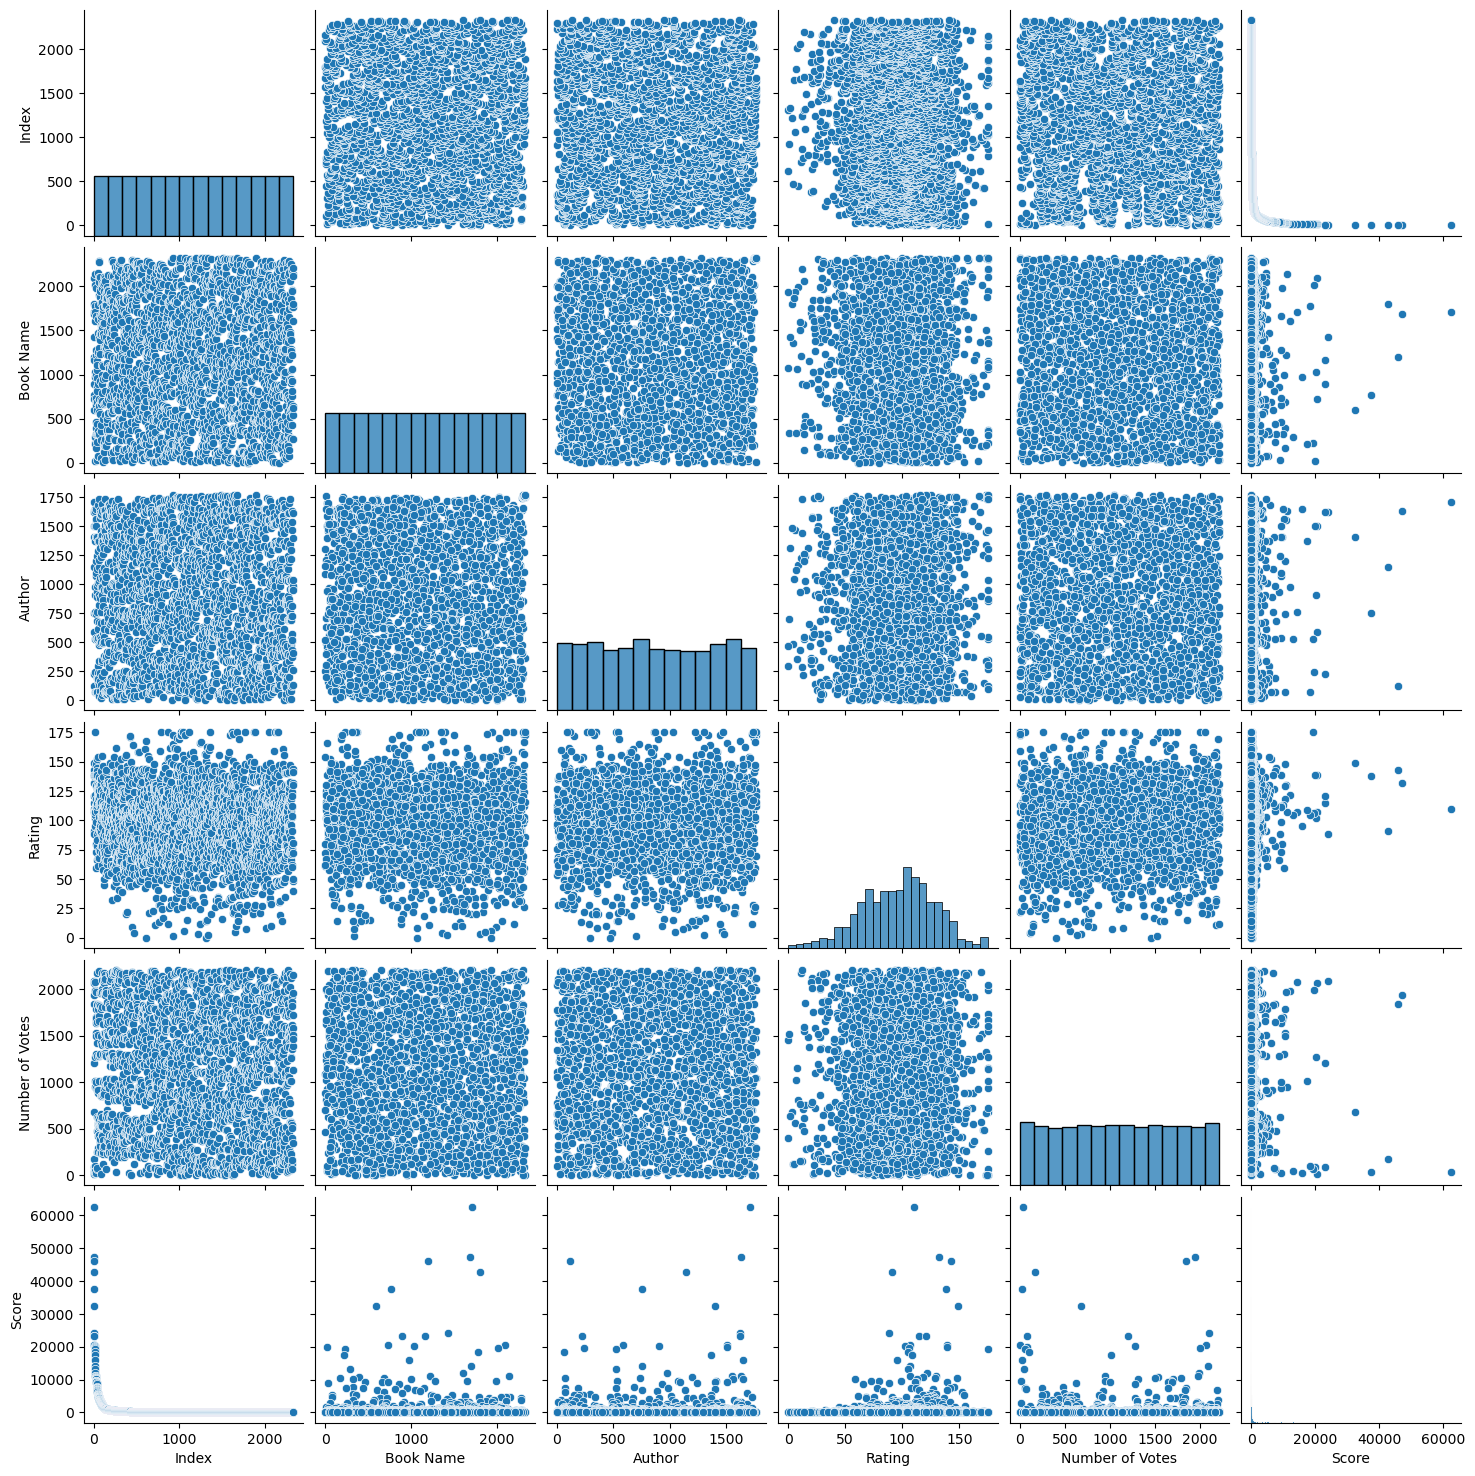

In [21]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='Score', ylabel='count'>

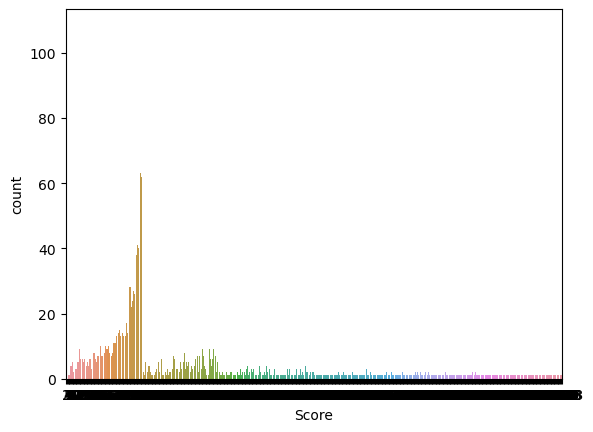

In [23]:
sns.countplot(x='Score',data=df)


In [24]:
df.corr()

,Index,Book Name,Author,Rating,Number of Votes,Score
Index,1.000000,-0.010594,-0.025833,-0.056362,-0.045534,-0.288849
Book Name,-0.010594,1.000000,0.010398,-0.037512,-0.031017,-0.002380
Author,-0.025833,0.010398,1.000000,0.031355,-0.005156,0.033340
Rating,-0.056362,-0.037512,0.031355,1.000000,0.024221,0.086316
Number of Votes,-0.045534,-0.031017,-0.005156,0.024221,1.000000,-0.026640
Score,-0.288849,-0.002380,0.033340,0.086316,-0.026640,1.000000


ValueError: Format specifier missing precision

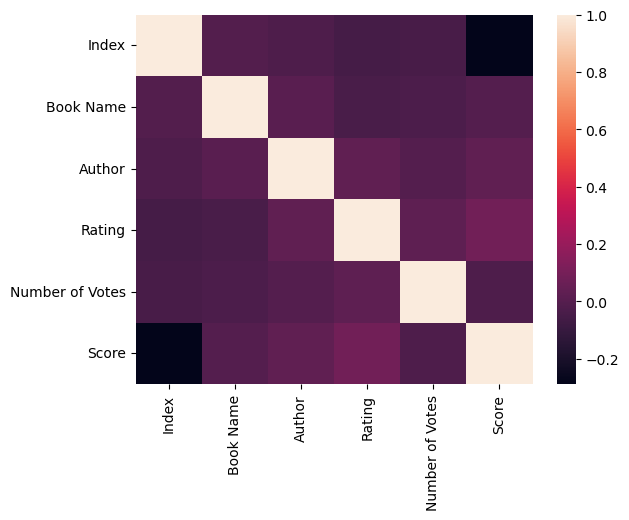

In [25]:
sns.heatmap(df.corr(),annot = True,fmt='.f2')

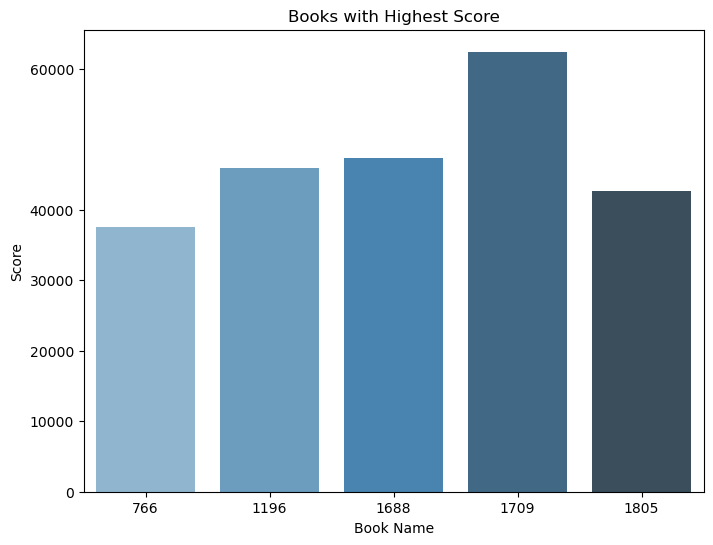

In [26]:

top_n = df.groupby('Book Name')['Score'].sum().nlargest(5).reset_index()


plt.figure(figsize=(8,6))
sns.barplot(x='Book Name', y='Score', data=top_n, ci=None, palette='Blues_d')


plt.yticks(ticks=[0, 10000, 20000, 30000, 40000, 60000])


plt.title('Books with Highest Score')
plt.xlabel('Book Name')
plt.ylabel('Score')


plt.show()


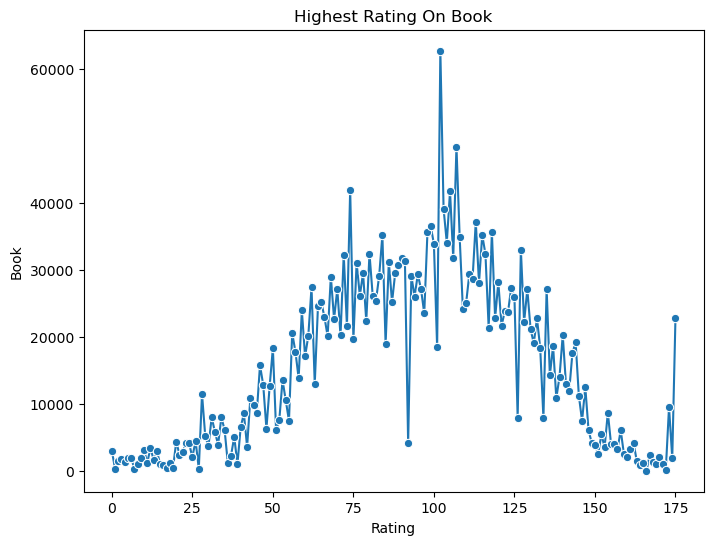

In [27]:
top_n = df.groupby('Rating')['Book Name'].sum().nlargest(5).reset_index()

region_sales = df.groupby('Rating')['Book Name'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(x='Rating', y='Book Name', data=region_sales, marker='o')

plt.yticks(ticks=[0, 10000, 20000, 30000, 40000, 60000])

plt.title('Highest Rating On Book')
plt.xlabel('Rating')
plt.ylabel('Book')
plt.show()


      Author  Rating
1228    1228   175.0
1301    1301   175.0
93        93   175.0
1031    1031   175.0
1735    1735   175.0
118      118   175.0
1468    1468   175.0
1759    1759   175.0
302      302   175.0
858      858   175.0


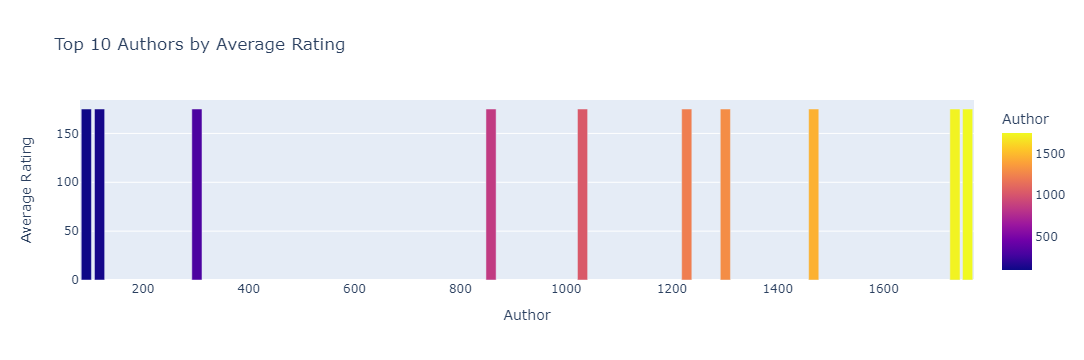

In [32]:
author_ratings = df.groupby('Author')['Rating'].mean().reset_index()
top_10_authors = author_ratings.sort_values(by='Rating', ascending=False).nlargest(10, 'Rating')
print(top_10_authors)
fig = px.bar(top_10_authors, x = 'Author', 
             y = 'Rating', 
             title = 'Top 10 Authors by Average Rating', 
             color = 'Author', 
             color_discrete_sequence = px.colors.qualitative.T10)

fig.update_layout(xaxis_title = 'Author', 
                  yaxis_title = 'Average Rating', 
                  xaxis = {'categoryorder':'total descending'})
fig.show()